In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readdata(infile, cols):
    """Read in csv as pandas DataFrame"""
    import pandas as pd
    data = pd.read_csv(infile, usecols = cols)
    return data

In [3]:
def kesler_room(room):
    """Build up Kesler's reconstruction by room type
       Private room = [1 0 0], Entire home/apt = [0 1 0], 
       Shared room = [0 0 1]"""
    import pandas as pd
    import numpy as np
    kesler = np.zeros([df.shape[0],3], dtype='int')
    for i, r in enumerate(room):
        if r == 'Private room':
            kesler[i, :] = [1, 0, 0]
        elif r == 'Entire home/apt':
            kesler[i, :] = [0, 1, 0]
        elif r == 'Shared room':
            kesler[i, :] = [0, 0, 1]
    return kesler

In [5]:
filename = "listings.csv"
colname = ['neighbourhood_cleansed','bedrooms','bathrooms',
           'beds','price','minimum_nights','accommodates',
           'zipcode', 'number_of_reviews','room_type']

df = readdata(filename, colname)

# load price individually, remove $ and convert string to numeric
df['price'] = df.price.str.replace("\$|,",'').astype(float)

# price range
price_zone = pd.cut(
            df.price.values,
            [0, 50, 100, 150, 200, 250, 300, 350, 400, 1000, 2500, 10000],
            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
            )

# load room type individually & keslerize as np array
room_type_num = kesler_room(df.room_type.values)

# combine and re-order dataframe
df['price_zone'] = price_zone
df['room_type_1'] = room_type_num[:,0]
df['room_type_2'] = room_type_num[:,1]
df['room_type_3'] = room_type_num[:,2]

newcols = ['neighbourhood_cleansed','room_type',
           'room_type_1','room_type_2','room_type_3',
           'zipcode','bedrooms','bathrooms','beds',
           'minimum_nights','accommodates','number_of_reviews',
           'price','price_zone']

df = df[newcols]

# NA
df = df.dropna()

# fix a zipcode typo, convert to number
df = df[df.zipcode != '95202\n\n\n94158']
df = df[df.zipcode != '15074']
df[['zipcode']]= df[['zipcode']].astype(int)
df.dtypes

# output to csv (for excel)
# df.to_csv('listings_cleaned.csv', index=False, sep=',')

neighbourhood_cleansed      object
room_type                   object
room_type_1                  int64
room_type_2                  int64
room_type_3                  int64
zipcode                      int64
bedrooms                   float64
bathrooms                  float64
beds                       float64
minimum_nights               int64
accommodates                 int64
number_of_reviews            int64
price                      float64
price_zone                category
dtype: object

In [6]:
df.sample(10)

,neighbourhood_cleansed,room_type,room_type_1,room_type_2,room_type_3,zipcode,bedrooms,bathrooms,beds,minimum_nights,accommodates,number_of_reviews,price,price_zone
2824,Mission,Private room,1,0,0,94103,1.0,1.0,1.0,3,2,18,90.0,2
8589,Western Addition,Entire home/apt,0,1,0,94115,2.0,1.0,3.0,2,6,5,225.0,5
7243,Chinatown,Shared room,0,0,1,94108,1.0,1.0,1.0,5,1,0,25.0,1
3353,Mission,Private room,1,0,0,94103,1.0,1.0,1.0,1,1,25,120.0,3
4378,Marina,Entire home/apt,0,1,0,94123,0.0,1.0,1.0,3,2,0,500.0,9
7847,Outer Sunset,Entire home/apt,0,1,0,94122,1.0,1.0,2.0,2,4,183,140.0,3
5301,South of Market,Entire home/apt,0,1,0,94103,2.0,2.0,4.0,1,6,13,349.0,7
6966,Bernal Heights,Private room,1,0,0,94110,1.0,1.0,1.0,1,2,1,127.0,3
3701,Mission,Entire home/apt,0,1,0,94103,3.0,2.0,3.0,2,7,19,500.0,9
3409,Mission,Entire home/apt,0,1,0,94103,1.0,1.0,1.0,2,2,33,255.0,6


In [7]:
df.describe()

,room_type_1,room_type_2,room_type_3,zipcode,bedrooms,bathrooms,beds,minimum_nights,accommodates,number_of_reviews,price
count,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000
mean,0.388705,0.594947,0.016348,94114.855265,1.355550,1.274608,1.740940,4.664113,3.212073,28.916086,252.065280
std,0.487484,0.490930,0.126819,10.466114,0.919355,0.634170,1.174612,18.510654,2.039166,51.648605,447.572516
min,0.000000,0.000000,0.000000,94014.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,10.000000
25%,0.000000,0.000000,0.000000,94109.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,105.000000
50%,0.000000,1.000000,0.000000,94114.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,165.000000
75%,1.000000,1.000000,0.000000,94118.000000,2.000000,1.500000,2.000000,3.000000,4.000000,31.000000,260.000000
max,1.000000,1.000000,1.000000,94401.000000,10.000000,8.000000,16.000000,1125.000000,16.000000,542.000000,10000.000000


[0, 10000, 0, 600]

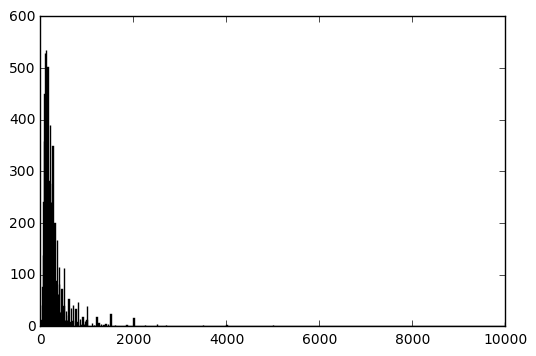

In [8]:
x = df['price']
plt.hist(x, 1000)
plt.axis([0,10000, 0, 600])